# Towards data wrangling
This notebook will show you how to use Pandas to clean, modify and update data in Pandas. Pandas is not the only tool to do this and this is not a cookbook of steps that you always need to take. Data can be messy in many different forms and all data is messy in different ways. This notebook will show you some of the steps that you can take. It is important to always look at your data to see what you will need to do to make it ready for analysis.

If there are pandas operations that are not known to you, consider to look at the introduction to pandas notebook and/or check: https://pandas.pydata.org/docs/user_guide/10min.html



## Importing the libraries

So... lets just start.

The first thing you need to do for almost all data science projects is to import the libraries you need. Besides Pandas we import [matplotlib](https://matplotlib.org/) and the [seaborn](https://seaborn.pydata.org/) library to create nice graphs etc.

In this tutorial a dataset of Eurostat is used on the bodymass index of people in European countries. (see https://ec.europa.eu/eurostat/data/database). The data can be downloaded using the URLs in the code, and more information can be found from [the eurostat documentation](https://ec.europa.eu/eurostat/databrowser/view/sdg_02_10/default/table?lang=en)

So run the code in the cell below to import the neccesary libraries for this exercise and read a csv file containing the eurostat (note the `sep='\t'` parameter in the `pd.read_csv` operator indicating that the colums in the file are separated by tabs).

In [1]:
# import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data from url as pandas dataframe
df = pd.read_csv('https://git.wur.nl/ds-smartenv/scripting-intro/-/raw/main/data/hlth_ehis_bm1e.tsv',
                 sep='\t')

# Let's look at what we got
df

moeilijke_column_naam  EU28     BE     BG      CZ     DK   \
0      PC,BMI18P5-24,ED0-2,F,TOTAL,2014   44.3  45.7   44.3    42.6   50.1    
1     PC,BMI18P5-24,ED0-2,F,Y15-19,2014   69.8  73.0   69.7    80.6   71.3    
2     PC,BMI18P5-24,ED0-2,F,Y15-24,2014   68.6  70.9   73.2    81.5   66.9    
3     PC,BMI18P5-24,ED0-2,F,Y15-64,2014   50.0  50.1   50.5    56.6   54.1    
4     PC,BMI18P5-24,ED0-2,F,Y18-24,2014   66.6  66.4   79.7   79.0 u  63.0    
...                                 ...    ...    ...    ...     ...    ...   
1195  PC,BMI_LT18P5,TOTAL,T,Y55-64,2014    1.1   1.2    1.0     0.6    2.1    
1196  PC,BMI_LT18P5,TOTAL,T,Y65-74,2014    1.0   1.1    0.9     0.2    1.5    
1197  PC,BMI_LT18P5,TOTAL,T,Y_GE18,2014    2.3   2.7    2.2     1.1    2.2    
1198  PC,BMI_LT18P5,TOTAL,T,Y_GE65,2014    1.5   1.8    1.2     0.4    2.3    
1199  PC,BMI_LT18P5,TOTAL,T,Y_GE75,2014    2.0   2.5    1.6     0.7    3.6    

        DE     EE      IE     EL   ...    PT     RO      SI      SK      FI   \
0     44.8   37.4    45.7   38.2   ...  38.6   44.1    36.0    40.6    42.6    
1     66.1   65.8   76.2 u  78.5   ...  65.1   80.8    74.0    72.7    66.2    
2     64.3   68.0   77.4 u  78.6   ...  63.2   78.1    73.4    72.6    66.8    
3     50.9   46.9    50.7   44.9   ...  42.0   49.1    41.2    51.9    50.8    
4     59.4   70.6      : u    : u  ...  59.8   69.2   77.6 u  77.2 u  68.1 u   
...     ...    ...     ...    ...  ...    ...    ...     ...     ...     ...   
1195   0.7    1.1     1.0    0.9   ...   0.6    0.8     0.8     1.2     0.8    
1196   0.8    1.2     1.7    0.8   ...   0.5    0.3     0.8     0.3     0.6    
1197   1.8    2.2     1.9    1.9   ...   1.8    1.3     1.6     2.1     1.2    
1198   1.4    1.3     2.1    1.1   ...   1.1    0.5     0.9     0.6     0.8    
1199   2.0    1.5     2.6    1.3   ...   1.9    0.8     1.0     1.0     1.1    

        SE      UK     IS     NO     TR   
0     48.5    37.0   48.3   54.3   36.7   
1     73.8   63.8 u  73.9   75.9   64.9   
2     72.1    65.1   74.6   69.0   64.2   
3     52.2    37.3   52.9   57.8   37.7   
4     73.7   66.7 u  77.7   66.1   62.6   
...     ...     ...    ...    ...    ...  
1195   0.4     0.8    0.2    0.8    0.8   
1196   1.5     1.1    0.2    1.4    1.5   
1197   1.8     2.1    1.2    1.8    3.1   
1198   1.7     1.7    0.9    2.1    2.3   
1199   1.9     2.5    1.9    2.9    3.5   

[1200 rows x 33 columns]

You see an extra parameter in the `read_csv` command called `sep='\t'`. What does this mean? Use the documentation it figure this out.

Now, we have read the data, let's look at it. We can look at the shape of the dataframe to see how many rows and columns we have. `df.shape` is a function that can be used for this. How many rows and columns does the dataframe have?


In [4]:
df.shape

(1200, 33)

Let's look at the column names.

In [3]:
df.columns

Index(['moeilijke_column_naam', 'EU28 ', 'BE ', 'BG ', 'CZ ', 'DK ', 'DE ',
       'EE ', 'IE ', 'EL ', 'ES ', 'FR ', 'HR ', 'IT ', 'CY ', 'LV ', 'LT ',
       'LU ', 'HU ', 'MT ', 'NL ', 'AT ', 'PL ', 'PT ', 'RO ', 'SI ', 'SK ',
       'FI ', 'SE ', 'UK ', 'IS ', 'NO ', 'TR '],
      dtype='object')

The column names contain country codes with whitespaces, as can be seen from the result of `df.columns`. This is annoying, because if we want to join this data with other data based on these values, they are not equal to the name without the space. Remember `'NL '` is not equal to `'NL'` .

Let's remove them.


In [16]:
df.columns = df.columns.str.strip()
df.columns

Index(['time', 'age', 'sex', 'isced11', 'bmi', 'unit', 'TR', 'NO', 'IS', 'UK',
       'SE', 'FI', 'SK', 'SI', 'RO', 'PT', 'PL', 'AT', 'NL', 'MT', 'HU', 'LU',
       'LT', 'LV', 'CY', 'IT', 'HR', 'FR', 'ES', 'EL', 'IE', 'EE', 'DE', 'DK',
       'CZ', 'BG', 'BE', 'EU28'],
      dtype='object')

Ok! Thats a good first step in cleaning the data to make it ready for analysis.

Let's look at the first rows of the dataset.

In [17]:
df.head(10)


time     age sex isced11         bmi unit     TR      NO      IS      UK  \
0  2014   TOTAL   F   ED0-2  BMI18P5-24   PC  36.7    54.3    48.3    37.0    
1  2014  Y15-19   F   ED0-2  BMI18P5-24   PC  64.9    75.9    73.9   63.8 u   
2  2014  Y15-24   F   ED0-2  BMI18P5-24   PC  64.2    69.0    74.6    65.1    
3  2014  Y15-64   F   ED0-2  BMI18P5-24   PC  37.7    57.8    52.9    37.3    
4  2014  Y18-24   F   ED0-2  BMI18P5-24   PC  62.6    66.1    77.7   66.7 u   
5  2014  Y18-29   F   ED0-2  BMI18P5-24   PC  58.4    64.8    66.4    54.9    
6  2014  Y18-44   F   ED0-2  BMI18P5-24   PC  43.2    62.3    53.8    45.0    
7  2014  Y18-64   F   ED0-2  BMI18P5-24   PC  33.7    55.8    47.5    36.3    
8  2014  Y20-24   F   ED0-2  BMI18P5-24   PC  62.6    50.9   77.7 u  66.4 u   
9  2014  Y25-29   F   ED0-2  BMI18P5-24   PC  53.5   59.4 u  25.9 u   45.5    

   ...     ES      EL      IE      EE     DE     DK      CZ      BG      BE  \
0  ...  42.1    38.2    45.7    37.4   44.8   50.1    42.6    44.3    45.7    
1  ...  71.5    78.5   76.2 u   65.8   66.1   71.3    80.6    69.7    73.0    
2  ...  68.3    78.6   77.4 u   68.0   64.3   66.9    81.5    73.2    70.9    
3  ...  48.5    44.9    50.7    46.9   50.9   54.1    56.6    50.5    50.1    
4  ...  63.6      : u     : u   70.6   59.4   63.0   79.0 u   79.7    66.4    
5  ...  59.7   72.4 u  68.2 u   64.5   57.5   58.6   79.1 u   73.1    60.6    
6  ...  54.7    56.3    56.3    55.1   48.3   50.3    66.2    59.8    49.9    
7  ...  45.9    40.0    43.0    45.3   45.3   47.4    47.2    48.2    45.1    
8  ...  59.6      : u     : u  71.5 u  53.0     : u     : u  82.9 u  63.1 u   
9  ...  54.7      : u     : u  48.9 u  48.2     : u     : u  61.3 u  43.4 u   

   EU28  
0  44.3  
1  69.8  
2  68.6  
3  50.0  
4  66.6  
5  63.3  
6  55.4  
7  46.4  
8  63.3  
9  56.5  

[10 rows x 38 columns]

Most values look good at first glance, but the first column contains some strange information. As you might notice the first column is somehow a compound column containing one string with six values: BMI class, Sex, age class, year.

It would be handy to separate this information in seperate columns. Looking more carefully, you also might notice the data items are seperated by commas.

It often happens that you might know what you want to happen, but don't know yet how to do this. Google is your friend in these situations. A simple [google search](https://www.google.com/search?q=pandas+split+values+in+column+in+multiple+columns&rlz=1C1GCFG_enNL1087NL1087&oq=pandas+split+values+in+column+in+multiple+columns+&gs_lcrp=EgZjaHJvbWUyCwgAEEUYChg5GKABMgkIARAhGAoYoAEyCQgCECEYChigAdIBCTE1NTczajBqN6gCALACAA&sourceid=chrome&ie=UTF-8) points us in the [right direction](https://saturncloud.io/blog/how-to-split-one-column-into-multiple-columns-in-pandas-dataframe/#:~:text=Using%20the%20pd.&text=split()%20method%20is%20another,list%20as%20a%20new%20column.).

We define 6 new colums (need to be same as the number of data items) to store the 6 values in, that are a result of splitting the column using the `.str.split` command.

See for more info https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html



In [18]:
df[['unit','bmi','isced11','sex','age','time']] = df['moeilijke_column_naam'].str.split(',', expand=True)
df.drop(columns='moeilijke_column_naam',inplace=True)
df.head(10)


KeyError: 'moeilijke_column_naam'

It is even neater to store these columns as first columns in the dataframe. A quick and dirty way to do this is to simply reverse the order of columns

In [19]:
reversedColumnList = list(reversed(df.columns))
df = df[reversedColumnList]
df.columns

Index(['EU28', 'BE', 'BG', 'CZ', 'DK', 'DE', 'EE', 'IE', 'EL', 'ES', 'FR',
       'HR', 'IT', 'CY', 'LV', 'LT', 'LU', 'HU', 'MT', 'NL', 'AT', 'PL', 'PT',
       'RO', 'SI', 'SK', 'FI', 'SE', 'UK', 'IS', 'NO', 'TR', 'unit', 'bmi',
       'isced11', 'sex', 'age', 'time'],
      dtype='object')

It's essenstial to know what datatype are in in order to decide what statistics or functions we can apply on the data. Apply the `.dtypes` command to the `df` datframe. What are the datatypes? Use [this overview](https://pbpython.com/pandas_dtypes.html) if there are datatypes that you do not onderstand completely.

In [20]:
df.dtypes

# type(df.iloc[10,10])

EU28       float64
BE          object
BG          object
CZ          object
DK          object
DE          object
EE          object
IE          object
EL          object
ES          object
FR         float64
HR          object
IT          object
CY          object
LV          object
LT          object
LU          object
HU          object
MT          object
NL          object
AT          object
PL          object
PT          object
RO          object
SI          object
SK          object
FI          object
SE          object
UK          object
IS          object
NO          object
TR          object
unit        object
bmi         object
isced11     object
sex         object
age         object
time        object
dtype: object

We can see that the BMI's per country are stored as strings, see also the commented command.

We want to change all datatypes where the column is a country code to a numeric value.

Understand what is happening here! What does `.to_numeric` mean? and why do we need to do that before executing the `astype` command?. And do you understand what a `float64` is? Use [the documentation of `.to_numeric`](https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html) to find out what `errors='coerce'` does.


In [21]:
countries = ['TR', 'NO', 'IS', 'UK','SE', 'FI', 'SK', 'SI', 'RO', 'PT', 'PL', 'AT', 'NL', 'MT', 'HU', 'LU','LT', 'LV', 'CY', 'IT', 'HR', 'FR', 'ES', 'EL', 'IE', 'EE', 'DE', 'DK','CZ', 'BG', 'BE', 'EU28']
for c in countries:
    df[c] = (pd.to_numeric(df[c], errors='coerce'))
    df[c] = df[c].astype('float64')
df.head(25)

EU28    BE    BG    CZ    DK    DE    EE    IE    EL    ES  ...    UK  \
0   44.3  45.7  44.3  42.6  50.1  44.8  37.4  45.7  38.2  42.1  ...  37.0   
1   69.8  73.0  69.7  80.6  71.3  66.1  65.8   NaN  78.5  71.5  ...   NaN   
2   68.6  70.9  73.2  81.5  66.9  64.3  68.0   NaN  78.6  68.3  ...  65.1   
3   50.0  50.1  50.5  56.6  54.1  50.9  46.9  50.7  44.9  48.5  ...  37.3   
4   66.6  66.4  79.7   NaN  63.0  59.4  70.6   NaN   NaN  63.6  ...   NaN   
5   63.3  60.6  73.1   NaN  58.6  57.5  64.5   NaN   NaN  59.7  ...  54.9   
6   55.4  49.9  59.8  66.2  50.3  48.3  55.1  56.3  56.3  54.7  ...  45.0   
7   46.4  45.1  48.2  47.2  47.4  45.3  45.3  43.0  40.0  45.9  ...  36.3   
8   63.3   NaN   NaN   NaN   NaN  53.0   NaN   NaN   NaN  59.6  ...   NaN   
9   56.5   NaN   NaN   NaN   NaN  48.2   NaN   NaN   NaN  54.7  ...  45.5   
10  53.7  44.1  55.6   NaN   NaN  36.4  41.9   NaN  56.4  53.8  ...  44.3   
11  43.8  41.9  42.5  40.1  40.1  41.9  35.4  37.7  38.5  44.4  ...  34.0   
12  49.0  36.3  49.3   NaN   NaN  40.6   NaN  44.8  50.9  51.9  ...  34.9   
13  43.6  42.3  36.8   NaN   NaN  43.2   NaN  32.5  34.2  41.0  ...  30.4   
14  40.2  42.5  33.5  32.4  44.1  43.1  18.5  36.3  32.5  38.9  ...  31.2   
15  37.5  42.7  31.4  29.0  39.0  43.0  16.2  39.1  31.2  37.1  ...  32.0   
16  32.8  34.1  27.9  18.9  40.3  35.3  26.5  36.0  28.5  28.9  ...  33.0   
17  41.8  42.4  42.5  35.5  45.7  41.1  36.1  40.9  35.4  40.0  ...  36.5   
18  36.4  39.1  34.7  23.7  43.9  37.3  27.6  38.6  31.2  30.0  ...  36.7   
19  39.3  43.2  41.5  28.0  46.6  38.6  28.3  41.3  33.2  31.1  ...  40.1   
20  40.7  41.9  44.6  55.2  46.7  42.4  46.7  37.5  30.4  35.5  ...  35.7   
21  72.9  65.6  79.1  79.5  72.0  73.5  69.4   NaN  70.8  75.5  ...   NaN   
22  70.6  65.4  75.3  77.3  72.3  70.3  65.0   NaN  70.8  69.8  ...  64.9   
23  45.0  45.1  48.5  59.6  53.2  47.6  50.3  39.0  33.8  39.3  ...  34.9   
24  68.1  62.3  74.7   NaN   NaN  66.0  61.0   NaN   NaN  63.5  ...   NaN   

      IS    NO    TR  unit         bmi  isced11  sex     age  time  
0   48.3  54.3  36.7    PC  BMI18P5-24    ED0-2    F   TOTAL  2014  
1   73.9  75.9  64.9    PC  BMI18P5-24    ED0-2    F  Y15-19  2014  
2   74.6  69.0  64.2    PC  BMI18P5-24    ED0-2    F  Y15-24  2014  
3   52.9  57.8  37.7    PC  BMI18P5-24    ED0-2    F  Y15-64  2014  
4   77.7  66.1  62.6    PC  BMI18P5-24    ED0-2    F  Y18-24  2014  
5   66.4  64.8  58.4    PC  BMI18P5-24    ED0-2    F  Y18-29  2014  
6   53.8  62.3  43.2    PC  BMI18P5-24    ED0-2    F  Y18-44  2014  
7   47.5  55.8  33.7    PC  BMI18P5-24    ED0-2    F  Y18-64  2014  
8    NaN  50.9  62.6    PC  BMI18P5-24    ED0-2    F  Y20-24  2014  
9    NaN   NaN  53.5    PC  BMI18P5-24    ED0-2    F  Y25-29  2014  
10  29.2  55.1  50.2    PC  BMI18P5-24    ED0-2    F  Y25-34  2014  
11  36.0  51.7  29.9    PC  BMI18P5-24    ED0-2    F  Y25-64  2014  
12   NaN  61.1  30.2    PC  BMI18P5-24    ED0-2    F  Y35-44  2014  
13  37.8  49.1  17.9    PC  BMI18P5-24    ED0-2    F  Y45-54  2014  
14  39.1  47.4  16.9    PC  BMI18P5-24    ED0-2    F  Y45-64  2014  
15  40.2  45.6  15.2    PC  BMI18P5-24    ED0-2    F  Y55-64  2014  
16  33.2  45.7  16.2    PC  BMI18P5-24    ED0-2    F  Y65-74  2014  
17  43.8  52.6  32.8    PC  BMI18P5-24    ED0-2    F  Y_GE18  2014  
18  36.6  44.9  21.6    PC  BMI18P5-24    ED0-2    F  Y_GE65  2014  
19  40.3  44.2  33.3    PC  BMI18P5-24    ED0-2    F  Y_GE75  2014  
20  44.4  43.9  42.2    PC  BMI18P5-24    ED0-2    M   TOTAL  2014  
21  67.4  73.4  69.3    PC  BMI18P5-24    ED0-2    M  Y15-19  2014  
22  63.3  64.6  69.1    PC  BMI18P5-24    ED0-2    M  Y15-24  2014  
23  47.2  45.6  42.8    PC  BMI18P5-24    ED0-2    M  Y15-64  2014  
24  55.5  60.6  70.3    PC  BMI18P5-24    ED0-2    M  Y18-24  2014  

[25 rows x 38 columns]

In [22]:
# type code to check the data types


EU28       float64
BE         float64
BG         float64
CZ         float64
DK         float64
DE         float64
EE         float64
IE         float64
EL         float64
ES         float64
FR         float64
HR         float64
IT         float64
CY         float64
LV         float64
LT         float64
LU         float64
HU         float64
MT         float64
NL         float64
AT         float64
PL         float64
PT         float64
RO         float64
SI         float64
SK         float64
FI         float64
SE         float64
UK         float64
IS         float64
NO         float64
TR         float64
unit        object
bmi         object
isced11     object
sex         object
age         object
time        object
dtype: object

The dataset is now how we want it. Lets try out some statistics.

We want to know:
1. Ranking of countries based on obese persons (i.e. bmi > 30)
2. Ranking of countries with highest % of obese children

## Find unique values

The BMI classes are in the column BMI. To dispay the uniques values in this column we can use the command `df.name.unique()`


In [24]:
unique_classes = df.bmi.unique()
print(unique_classes)

['BMI18P5-24' 'BMI25-29' 'BMI_GE25' 'BMI_GE30' 'BMI_LT18P5']


### Pivot table

Pivot tables are one way of reshaping your data. Especially for 'stacked' data formats such as our dataframe, reshaping functions such as pivotting helps to create a clear overview of the data.

See: https://pandas.pydata.org/docs/user_guide/reshaping.html

In [27]:
df_pivot = pd.pivot_table(df,index=["bmi"], aggfunc=np.mean)
df_pivot

<ipython-input-27-3d1f4f8d1a56>:1: FutureWarning: The operation <function mean at 0x785d483083a0> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_pivot = pd.pivot_table(df,index=["bmi"], aggfunc=np.mean)


AT         BE         BG         CY         CZ         DE  \
bmi                                                                            
BMI18P5-24  54.125000  51.904329  48.653881  49.757277  49.109756  51.029536   
BMI25-29    29.477586  31.734632  34.527397  31.335681  32.177073  30.952321   
BMI_GE25    42.425862  43.672294  46.635160  44.183099  47.680488  45.690295   
BMI_GE30    12.948276  11.932900  12.107306  12.839437  15.506341  14.735021   
BMI_LT18P5   3.448707   4.423377   3.338813   4.653521   1.747805   3.280169   

                   DK         EE         EL         ES  ...         NL  \
bmi                                                     ...              
BMI18P5-24  52.636916  47.435455  46.055760  51.664706  ...  54.085965   
BMI25-29    29.620561  30.716364  35.375576  31.451681  ...  31.561842   
BMI_GE25    43.502804  48.138182  49.901843  44.328992  ...  42.863596   
BMI_GE30    13.884112  17.424091  14.529954  12.884034  ...  11.300439   
BMI_LT18P5   3.397196   3.060909   2.659447   3.586555  ...   2.613596   

                   NO         PL         PT         RO         SE         SI  \
bmi                                                                            
BMI18P5-24  51.796104  48.755274  52.486957  50.159746  51.450909  48.493088   
BMI25-29    32.755844  32.318987  31.660000  39.088983  32.182273  33.095853   
BMI_GE25    44.738095  45.999156  43.988696  46.501695  44.728182  48.967281   
BMI_GE30    11.981385  13.678059  12.330870   7.416102  12.549545  15.874654   
BMI_LT18P5   2.164502   3.986498   3.528261   2.070339   2.455909   2.541935   

                   SK         TR         UK  
bmi                                          
BMI18P5-24  48.919139  47.045815  45.387946  
BMI25-29    33.426316  32.055507  33.125000  
BMI_GE25    47.010048  47.751542  51.485714  
BMI_GE30    13.583732  15.699119  18.362054  
BMI_LT18P5   3.587081   4.762115   3.125000  

[5 rows x 32 columns]

Another option for reshaping the data based on values is to group the data by a values.

see: https://pandas.pydata.org/docs/user_guide/10min.html#grouping

In [28]:
meanBMIPerCountry = df[['NL','BE']].groupby(df['age']).mean()
meanBMIPerCountry

NL         BE
age                         
TOTAL   29.415000  29.536667
Y15-19  19.822500  22.726667
Y15-24  23.510909  23.480000
Y15-64  28.850000  28.913333
Y18-24  24.014545  24.116667
Y18-29  25.190000  26.060000
Y18-44  27.455000  27.698333
Y18-64  29.330000  29.408333
Y20-24  24.211111  24.274000
Y25-29  26.904000  28.463636
Y25-34  27.248333  27.771667
Y25-64  30.215000  30.025000
Y35-44  30.050000  29.545000
Y45-54  31.270000  30.520000
Y45-64  31.545000  31.215000
Y55-64  31.968333  32.115000
Y65-74  32.003333  32.076667
Y_GE18  29.796667  29.896667
Y_GE65  31.426667  31.726667
Y_GE75  30.649091  31.331667

## Making a simple plot

<BarContainer object of 32 artists>

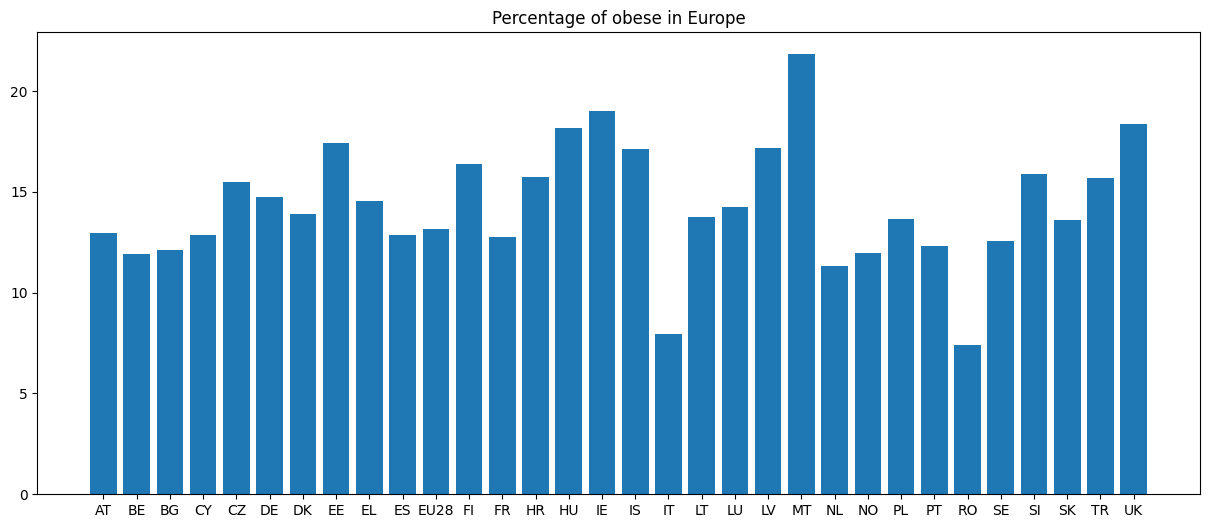

In [30]:
# Create a dataframe of the obese percentage in europe
df_pivot_obese = df_pivot.loc[['BMI_GE30']]
df_pivot_obese_transpose = df_pivot_obese.transpose()

# Using matplotlib to create a bar chart
fig= plt.figure(figsize=(15,6))
plt.title('Percentage of obese in Europe')
plt.bar(df_pivot_obese_transpose.index, df_pivot_obese_transpose['BMI_GE30'])


### Plotting with seaborn

While matplotlib is a nice tool to visualize data, it can become quite complex and there are other libraries that can help us visualize it in other ways as well. Lets try plotting the same data with Seaborn. Play around with the plot options and see if you can make the plot nicer.

<Axes: ylabel='BMI_GE30'>

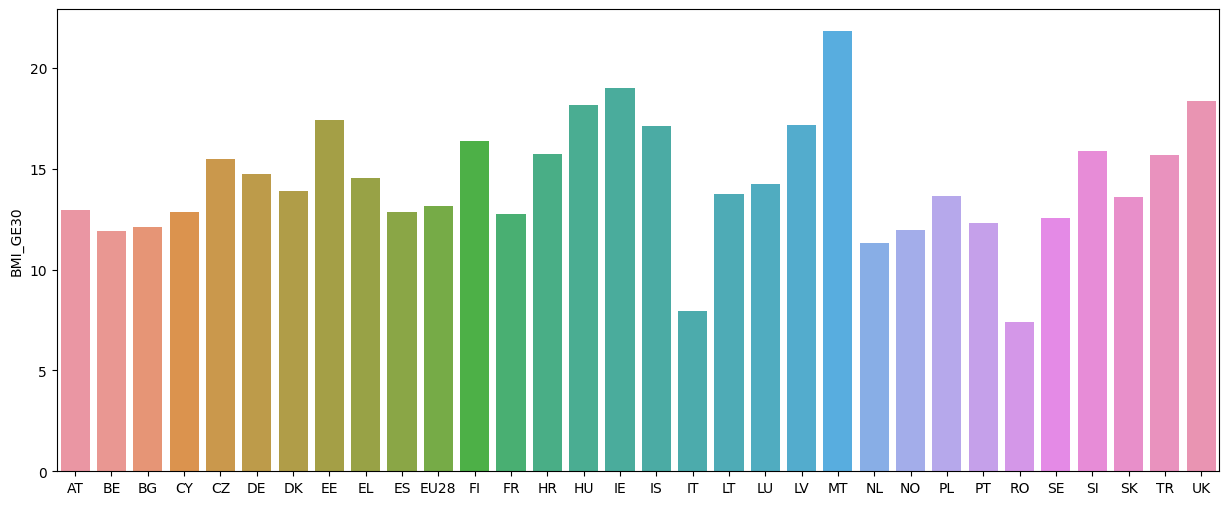

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_pivot_obese_transpose.index, y='BMI_GE30', data=df_pivot_obese_transpose )
